-	Apply Data Cleaning to the Datasets and then apply PCA Find pattern and the choose the number of desired Principal components.

-	Provide the inferences for the above analysis.


In [1]:
import numpy as np, pandas as pd, pylab as pl, matplotlib.pyplot as plt, seaborn as sns, warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from numpy import array, mean, cov
from numpy.linalg import eig
from sklearn.decomposition import PCA
from sklearn import datasets, preprocessing
from pandas import Series, DataFrame
from matplotlib import style
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [62]:
df = pd.read_csv('cancer.csv')
df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1000025,5,1,1,1,2,1,3,1,1,2,NaN,NaN,NaN
1,1002945,5,4,4,5,7,10,3,2,1,2,NaN,NaN,NaN
2,1015425,3,1,1,1,2,2,3,1,1,2,NaN,NaN,NaN
3,1016277,6,8,8,1,3,4,3,7,1,2,NaN,NaN,NaN
4,1017023,4,1,1,3,2,1,3,1,1,2,NaN,NaN,NaN


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 14 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
Unnamed: 11                    0 non-null float64
Unnamed: 12                    0 non-null float64
Unnamed: 13                    0 non-null float64
dtypes: float64(3), int64(10), object(1)
memory usage: 76.6+ KB


In [64]:
df.drop(['Unnamed: 11','Unnamed: 12','Unnamed: 13'], 1, inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [66]:
df = df.replace('?', np.nan)

In [68]:
df['Bare Nuclei'].fillna(df['Bare Nuclei'].mode()[0], inplace=True)

In [70]:
df['Bare Nuclei'].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [71]:
y = df.Class
X = df.drop('Class', axis=1)

In [72]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [73]:
cov_matrix = np.cov(X_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00143266 -0.05538768 -0.04166294 -0.04163563 -0.06497103 -0.0455935
  -0.09266525 -0.06013656 -0.05214655 -0.03495066]
 [-0.05538768  1.00143266  0.64583645  0.65552689  0.48705303  0.52256381
   0.5908535   0.5592282   0.53660222  0.35053534]
 [-0.04166294  0.64583645  1.00143266  0.90818117  0.70659267  0.75287621
   0.68765657  0.75680368  0.72390044  0.4593503 ]
 [-0.04163563  0.65552689  0.90818117  1.00143266  0.68405782  0.72069948
   0.70848734  0.73700282  0.72047704  0.43953974]
 [-0.06497103  0.48705303  0.70659267  0.68405782  1.00143266  0.60045809
   0.66792658  0.66767051  0.60421681  0.41823111]
 [-0.0455935   0.52256381  0.75287621  0.72069948  0.60045809  1.00143266
   0.5845377   0.61698451  0.62978166  0.47978787]
 [-0.09266525  0.5908535   0.68765657  0.70848734  0.66792658  0.5845377
   1.00143266  0.67518063  0.5756016   0.34288766]
 [-0.06013656  0.5592282   0.75680368  0.73700282  0.66767051  0.61698451
   0.67518063  1.00143266  0.66

In [74]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [75]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-3.31491869e-02  9.94394189e-01  5.63656313e-02 -9.81157635e-04
  -1.88835981e-03 -7.05956214e-02 -1.00431389e-02 -2.35426898e-02
  -2.79282046e-02  2.19286677e-02]
 [ 3.02676831e-01 -6.18816821e-03  1.45546172e-01 -1.43314936e-03
  -8.62162969e-01 -8.99072568e-02 -7.27302170e-02 -2.39129963e-01
   1.52829668e-02 -2.70273949e-01]
 [ 3.80859478e-01  4.27324982e-02  5.31233880e-02 -7.35600520e-01
   1.87637551e-02  1.95586949e-01  1.36836263e-01  4.45244701e-01
   2.15204648e-01 -8.54598835e-02]
 [ 3.77249002e-01  3.93239148e-02  8.86091500e-02  6.65452585e-01
  -3.48883123e-02  1.68182825e-01  1.04092971e-01  5.88396746e-01
   1.36078302e-01 -1.98004390e-02]
 [ 3.32707509e-01 -1.35819684e-02  4.29465752e-02  4.66930534e-02
   4.21825711e-01 -4.72896959e-01 -3.78994415e-02 -1.15906942e-01
  -5.12916425e-02 -6.82661344e-01]
 [ 3.36148205e-01  3.80241018e-02 -1.61252225e-01  6.78527284e-02
   1.09767726e-01  3.72995911e-01  6.85286310e-01 -4.50746734e-01
  -1.75041877e-

In [76]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 58.95498259  68.94864676  76.68912879  82.07740763  86.70788262
  90.51199661  93.54465851  96.4961353   99.11179139 100.        ]


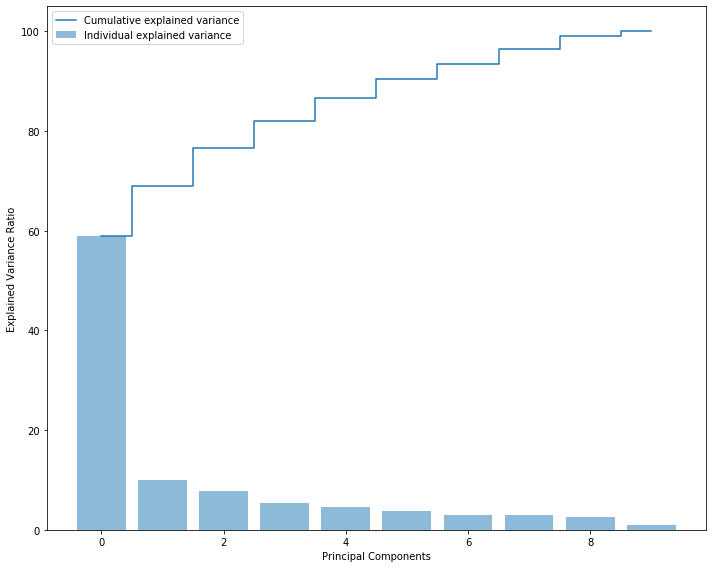

In [78]:
plt.figure(figsize=(10 , 8))
plt.bar(range(10), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(10), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [79]:
# First 4 principal components explain 90% of the variance in the data. 
# The PCA will have to be named because they represent composite of original dimensions

In [80]:
pca = PCA()
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

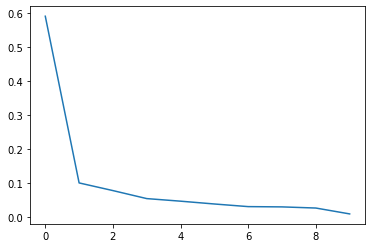

In [81]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [82]:
 #the number of desired Principal components is 2

In [85]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

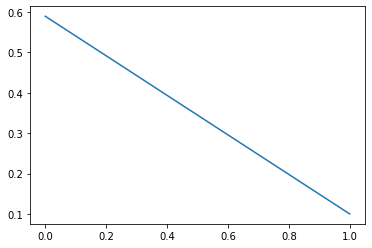

In [86]:
plt.plot(pca.explained_variance_ratio_)
plt.show()